<a href="https://colab.research.google.com/github/frank-lacriola/Data-Science-Lab/blob/main/Lab8_Regression_timeSeries_WW2_temps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


1.   f1(x) = x · sin(x) + 2x
2.   f2(x) = 10 sin(x) + x^2
3.   f3(x) = sign(x)(x^2 + 300) + 20 sin(x)




# 1.1 - 1.4 Regression to synthetic data



In [80]:
f1 = np.multiply(X, np.sin(X)) + np.multiply(X, 2)
f2 = np.multiply(10, np.sin(X)) + np.power(X, 2)
f3 = np.multiply(np.sign(X), np.power(X, 2)+300) + np.multiply(20, np.sin(X))

In [82]:
tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples)
y = f3
X_train, X_test, y_train, y_test = train_test_split(
  X, y, train_size=0.7, random_state=42, shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

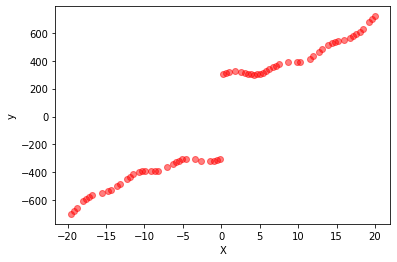

In [83]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Let's start with linear regression


In [84]:

reg = LinearRegression(fit_intercept = True) # default
reg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE for OLS regression is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE for OLS regression is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 for OLS regression is: ", r2_score(y_test, y_test_pred))

The MAE for OLS regression is:  83.00990341591526
The MSE for OLS regression is:  13568.763949623855
The R2 for OLS regression is:  0.9322327960738965


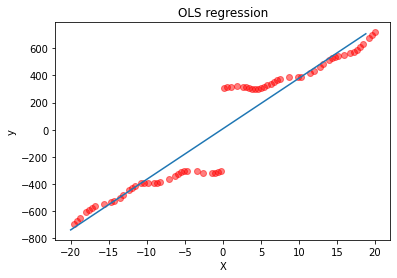

In [85]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)

m, b = np.polyfit(X_test, y_test_pred, 1)
plt.plot(X_test, m*X_test + b)

plt.xlabel("X")
plt.ylabel("y")
plt.title("OLS regression")
plt.show()

Epsilon-Support Vector Regression.



In [86]:
from sklearn.svm import SVR

reg = SVR(epsilon=0.1, kernel='rbf') # default
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE for OLS regression is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE for OLS regression is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 for OLS regression is: ", r2_score(y_test, y_test_pred))

The MAE for OLS regression is:  457.8367962938813
The MSE for OLS regression is:  304500.1614636245
The R2 for OLS regression is:  -0.520781451726037


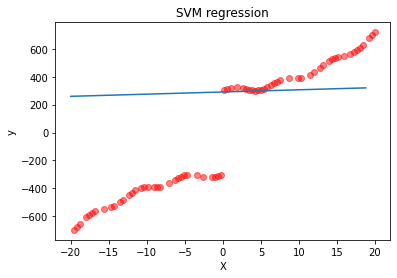

In [87]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)

m, b = np.polyfit(X_test, y_test_pred, 1)
plt.plot(X_test, m*X_test + b)

plt.xlabel("X")
plt.ylabel("y")
plt.title("SVM regression")
plt.show()

Ridge Regression.

In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge(fit_intercept=True) # default
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE  is: ", mean_squared_error(y_test, y_test_pred))
print("The R2  is: ", r2_score(y_test, y_test_pred))

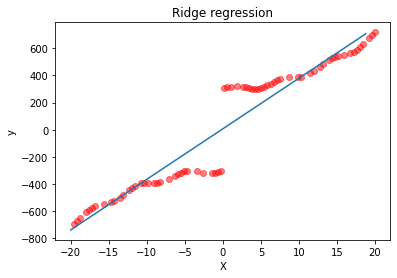

In [89]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)

m, b = np.polyfit(X_test, y_test_pred, 1)
plt.plot(X_test, m*X_test + b)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge regression")
plt.show()

MLP Regression; it optimizes the squared error using LBFGS or stochastic gradient descent


In [90]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(max_iter=200) # default
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE  is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE  is: ", mean_squared_error(y_test, y_test_pred))
print("The R2  is: ", r2_score(y_test, y_test_pred))

The MAE  is:  393.6003317390225
The MSE  is:  163114.00714369584
The R2  is:  0.1853509850750138


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


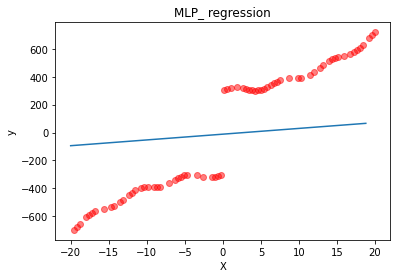

In [91]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)

m, b = np.polyfit(X_test, y_test_pred, 1)
plt.plot(X_test, m*X_test + b)

plt.xlabel("X")
plt.ylabel("y")
plt.title("MLP_ regression")
plt.show()

RF Regressor


In [92]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor() # default
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE  is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE  is: ", mean_squared_error(y_test, y_test_pred))
print("The R2  is: ", r2_score(y_test, y_test_pred))

The MAE  is:  5.529194811721336
The MSE  is:  70.31744458614494
The R2  is:  0.9996488098234649


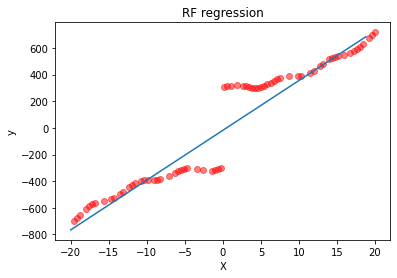

In [93]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)

m, b = np.polyfit(X_test, y_test_pred, 1)
plt.plot(X_test, m*X_test + b)

plt.xlabel("X")
plt.ylabel("y")
plt.title("RF regression")
plt.show()

Most performing with f1:


1.   RF Regressor 
The MAE  is:  2.0993614635551348
The MSE  is:  7.329359963003432
The R2  is:  0.9862133813492747

2.   MLP/Ridge: The MAE is:  5.851781153913739
The MSE is:  54.961160365684144
The R2  is:  0.896617363263935

Most performing with f2:



1.   RF: The MAE  is:  4.992875327624448
The MSE  is:  41.209433223350075
The R2  is:  0.9967524816461003


Most performing with f3:



1.   RF: The MAE  is:  5.529194811721336
The MSE  is:  70.31744458614494
The R2  is:  0.9996488098234649
2.  Ridge/Linear Regresison: The MAE is:  82.99599437078463
The MSE  is:  13569.372683993237
The R2  is:  0.932229755839259





# 1.5 Polynomial / Trigonometric features 

In [110]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


1.   f1(x) = x · sin(x) + 2x
2.   f2(x) = 10 sin(x) + x^2
3.   f3(x) = sign(x)(x^2 + 300) + 20 sin(x)




In [158]:
tr = 20
n_samples = 100
y = f3
X_train, X_test, y_train, y_test = train_test_split(
  X, y, train_size=0.7, random_state=42, shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

In [159]:
X_train.shape, y_train.shape

((70,), (70,))

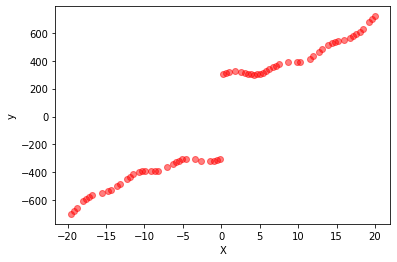

In [160]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Let's start with linear regression


In [161]:
reg = make_pipeline(PolynomialFeatures(5), LinearRegression())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  63.64794812910757
The MSE is:  7508.528298696274
The R2 is:  0.9624997552988771


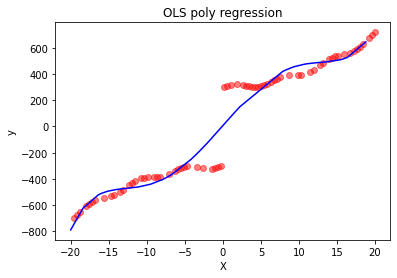

In [162]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("OLS poly regression")
plt.show()

Epsilon-Support Vector Regression.



In [163]:
from sklearn.svm import SVR

reg = make_pipeline(PolynomialFeatures(5), SVR())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  474.41929880671864
The MSE is:  326552.8592373479
The R2 is:  -0.6309204203676184


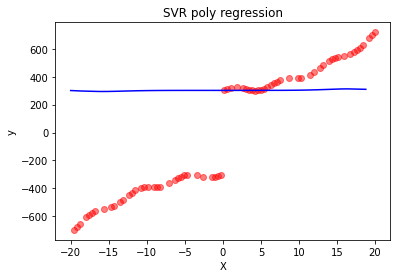

In [164]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("SVR poly regression")
plt.show()

Ridge Regression.

In [165]:
from sklearn.linear_model import Ridge

reg = make_pipeline(PolynomialFeatures(5), Ridge())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  63.47541517501624
The MSE is:  7507.305781631645
The R2 is:  0.962505860981276


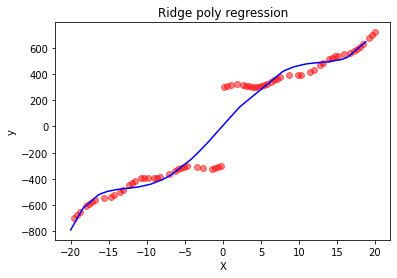

In [166]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge poly regression")
plt.show()

MLP Regression; it optimizes the squared error using LBFGS or stochastic gradient descent


In [167]:
from sklearn.neural_network import MLPRegressor

reg = make_pipeline(PolynomialFeatures(5), MLPRegressor())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  1196.7476365687467
The MSE is:  3730117.421786656
The R2 is:  -17.62952505688885


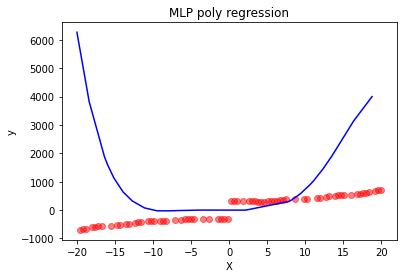

In [168]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("MLP poly regression")
plt.show()

RF Regressor


In [169]:
from sklearn.ensemble import RandomForestRegressor

reg = make_pipeline(PolynomialFeatures(5), RandomForestRegressor())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  6.710470415828488
The MSE is:  101.03154447802743
The R2 is:  0.9994954127507096


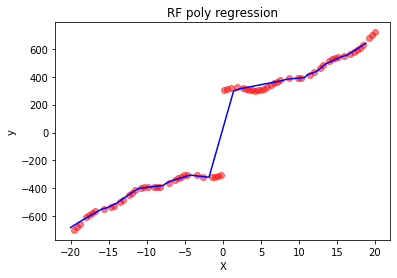

In [170]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("RF poly regression")
plt.show()

Most performing with f1:


1.   RF Regressor 0.99


2.   MLP/Ridge 0.89

Most performing with f2:



1.   RF/Ridge OLS 0.99


Most performing with f3:



1.   RF: 0.999
2.  Ridge: 0.96





# 1.6 Injecting Noise


In [172]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [171]:
def inject_noise(y):
  """Add a random noise drawn from a normal distribution."""
  return y + np.random.normal(0, 50, size=y.size)

In [201]:
tr = 20
n_samples = 100
y = f2
y = inject_noise(y)
X_train, X_test, y_train, y_test = train_test_split(
  X, y, train_size=0.7, random_state=42, shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

In [202]:
X_train.shape, y_train.shape

((70,), (70,))

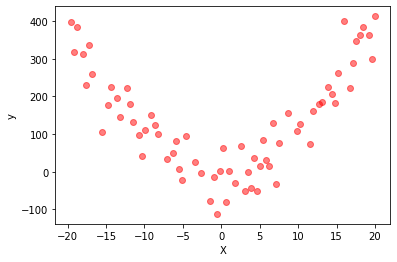

In [203]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Let's start with linear regression


In [204]:
reg = make_pipeline(PolynomialFeatures(5), LinearRegression())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  44.34975248388139
The MSE is:  3183.5379365274434
The R2 is:  0.7892812601912894


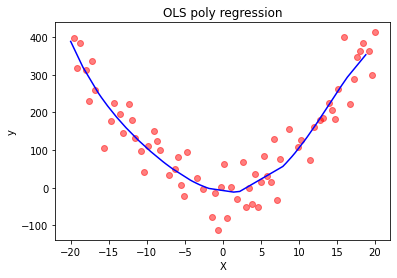

In [205]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("OLS poly regression")
plt.show()

Epsilon-Support Vector Regression.



In [206]:
from sklearn.svm import SVR

reg = make_pipeline(PolynomialFeatures(5), SVR())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  99.21332788077022
The MSE is:  13626.099475935942
The R2 is:  0.09808691860311325


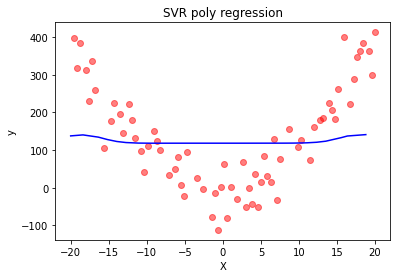

In [207]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("SVR poly regression")
plt.show()

Ridge Regression.

In [208]:
from sklearn.linear_model import Ridge

reg = make_pipeline(PolynomialFeatures(5), Ridge())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  44.34564061302679
The MSE is:  3182.9850242929197
The R2 is:  0.7893178575152751


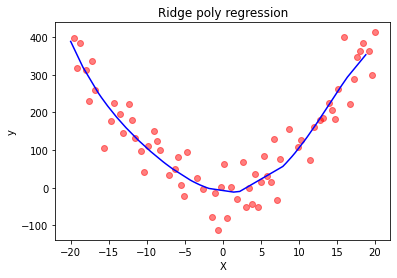

In [209]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge poly regression")
plt.show()

MLP Regression; it optimizes the squared error using LBFGS or stochastic gradient descent


In [218]:
from sklearn.neural_network import MLPRegressor

reg = make_pipeline(PolynomialFeatures(5), MLPRegressor(random_state=1, max_iter=50))
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  6283.467719433535
The MSE is:  145533001.10170045
The R2 is:  -9631.845973301204


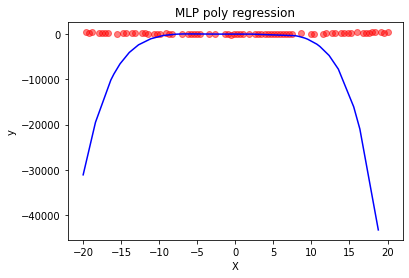

In [219]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("MLP poly regression")
plt.show()

RF Regressor


In [212]:
from sklearn.ensemble import RandomForestRegressor

reg = make_pipeline(PolynomialFeatures(5), RandomForestRegressor())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  57.56960625500447
The MSE is:  5010.2617618752165
The R2 is:  0.6683702014477269


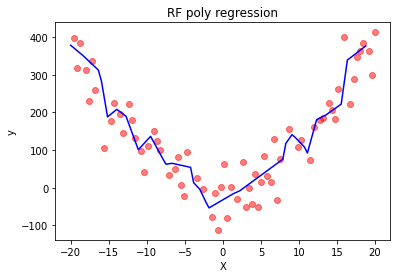

In [213]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("RF poly regression")
plt.show()

Most performing with f1:


1.   Ridge Linear regression 0.116


2.   SVR -0.017490228542584196

Most performing with f2:



1.   Ridge OLS 0.7892812601912894
2.   RF 0.67


Most performing with f3:



1.   RF: 0.989
2.  Ridge: 0.94



